In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_22988\1478074700.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_excel("click_predict.xlsx")

In [3]:
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.004777e+16,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,89bdfe24,2347f47a,...,1,0,20346,300,250,2331,2,39,100060,23
1,1.018523e+16,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
2,1.039453e+16,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,-1,79
3,1.052060e+16,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
4,1.059789e+16,0,14102100,1005,0,18859862,b5188ae6,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
5,1.133408e+16,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
6,1.165164e+16,0,14102100,1005,0,f282ab5a,61eb5bc4,f028772b,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,100210,157
7,1.175771e+15,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,-1,79
8,1.195737e+16,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,090d3a47,0654b444,...,1,0,20596,320,50,2161,0,35,-1,157
9,1.240602e+16,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,f5929c05,2347f47a,...,1,0,1278,320,50,196,3,303,100126,15


In [4]:
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5010 non-null   float64
 1   click             5010 non-null   int64  
 2   hour              5010 non-null   int64  
 3   C1                5010 non-null   int64  
 4   banner_pos        5010 non-null   int64  
 5   site_id           5010 non-null   object 
 6   site_domain       5010 non-null   object 
 7   site_category     5010 non-null   object 
 8   app_id            5010 non-null   object 
 9   app_domain        5010 non-null   object 
 10  app_category      5010 non-null   object 
 11  device_id         5010 non-null   object 
 12  device_ip         5010 non-null   object 
 13  device_model      5010 non-null   object 
 14  device_type       5010 non-null   int64  
 15  device_conn_type  5010 non-null   int64  
 16  C14               5010 non-null   int64  


In [6]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.010000e+03,5010.000000,5.010000e+03,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000
mean,4.942397e+16,0.159481,1.410210e+07,1005.058483,0.233333,1.021956,0.222555,18165.107385,318.901397,56.194411,2030.805190,1.405988,187.767665,44974.260878,70.906587
std,2.877848e+16,0.366161,1.414858e+00,1.136507,0.456149,0.465968,0.657413,3526.710270,20.705241,35.232017,441.520653,1.359969,267.709593,49797.233902,38.891067
min,9.984920e+12,0.000000,1.410210e+07,1002.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,2.379497e+16,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,15706.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,43.000000
50%,5.000894e+16,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,19251.000000,320.000000,50.000000,2161.000000,1.000000,39.000000,-1.000000,61.000000
75%,7.431740e+16,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,20632.000000,320.000000,50.000000,2366.000000,3.000000,297.000000,100084.000000,79.000000
max,9.996432e+16,1.000000,1.410210e+07,1012.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100241.000000,195.000000


In [7]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [8]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

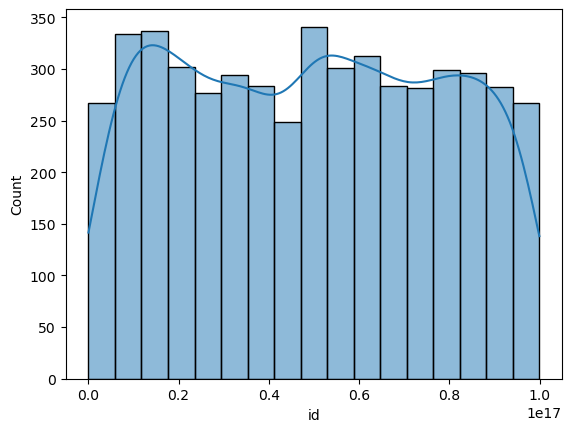

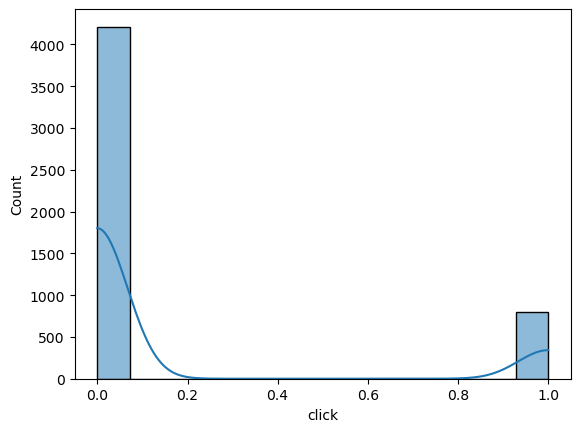

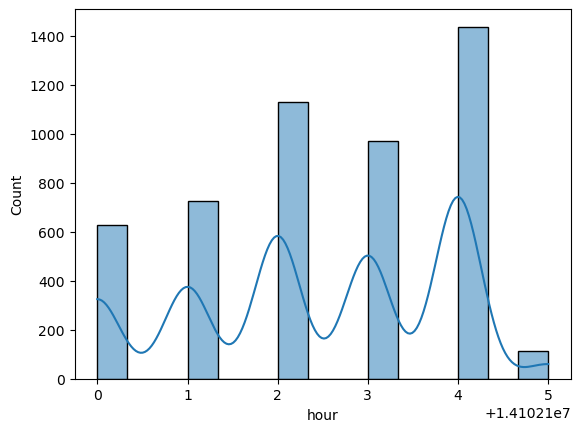

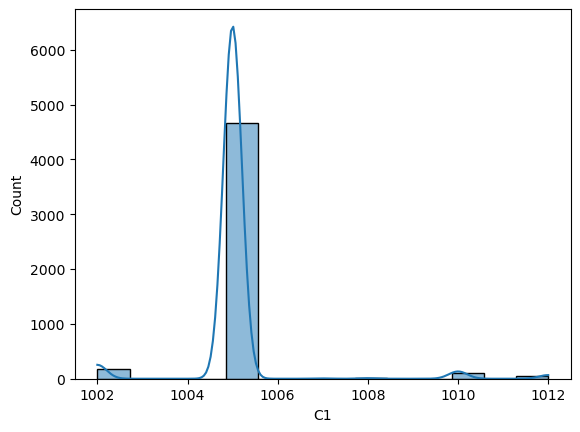

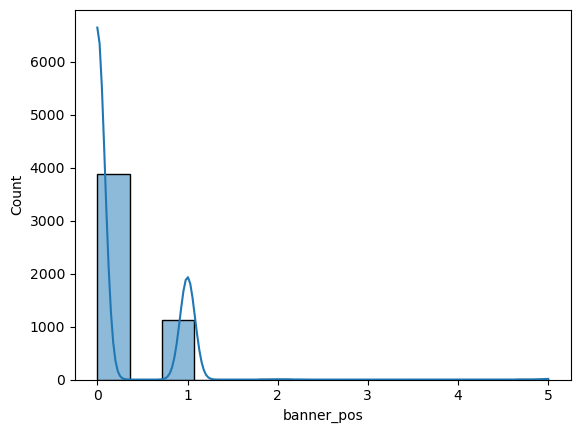

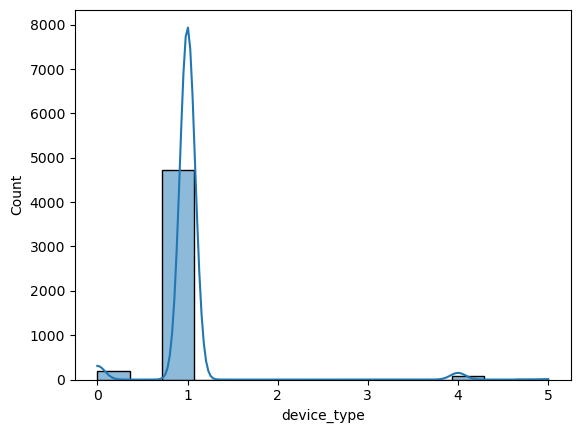

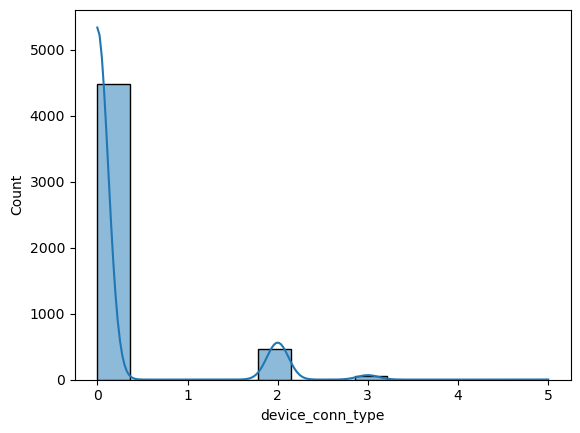

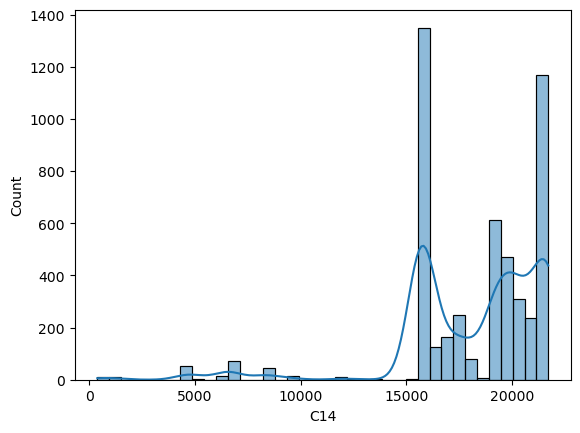

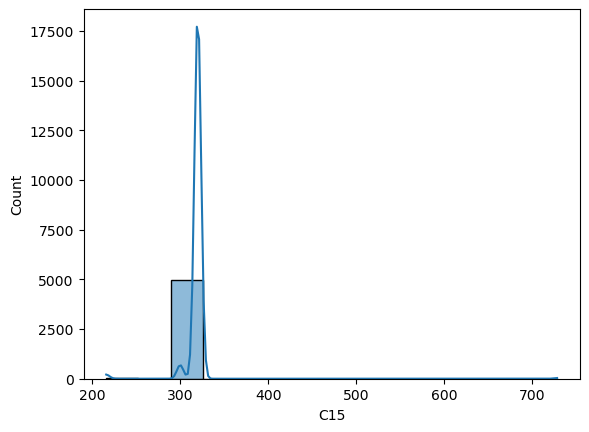

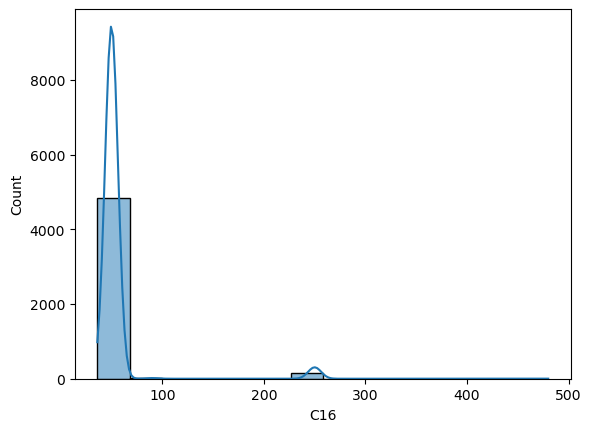

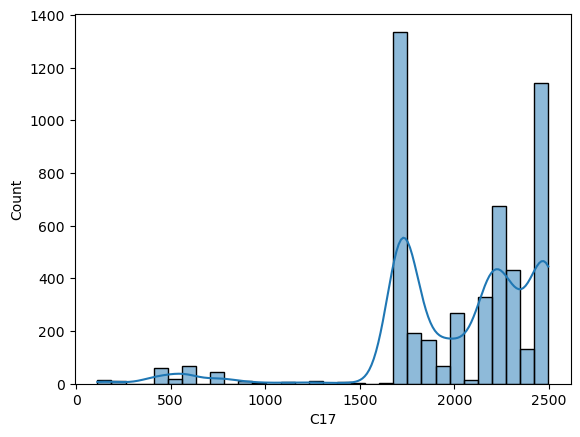

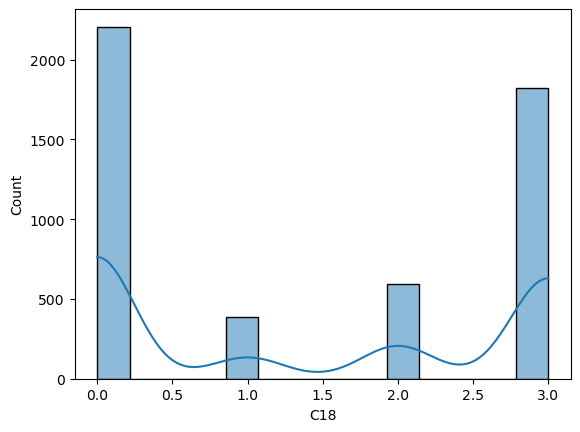

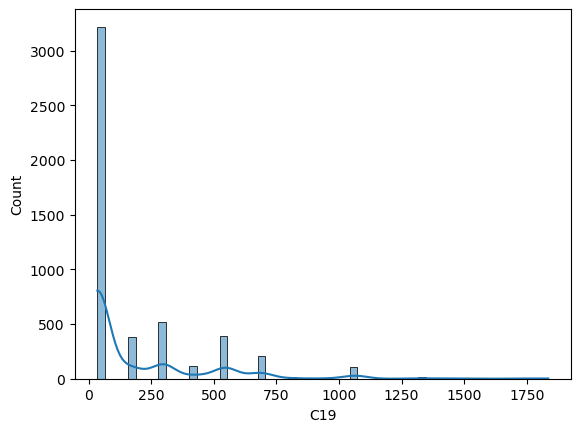

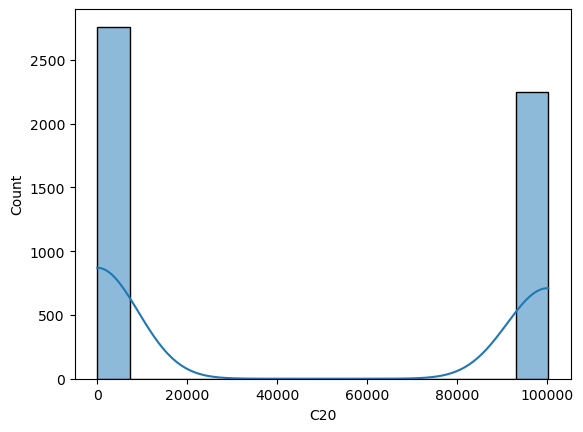

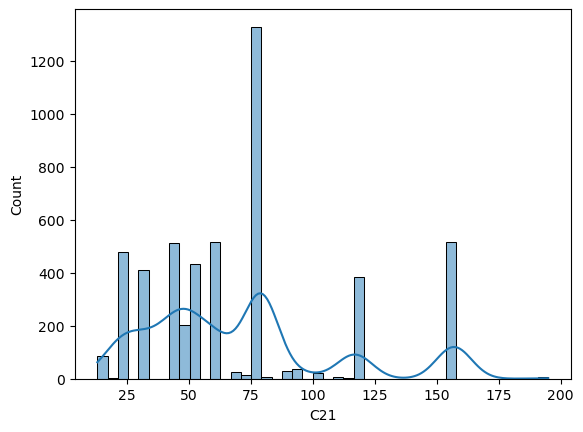

In [9]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

In [10]:
df.drop(labels='id',axis=1,inplace=True)

In [11]:
df.tail()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
5005,0,14102105,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15701,320,50,1722,0,35,-1,79
5006,0,14102105,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15703,320,50,1722,0,35,-1,79
5007,0,14102105,1005,0,85f751fd,c4e18dd6,50e219e0,14302827,2347f47a,0f2161f8,...,1,0,20476,320,50,2348,3,427,100003,61
5008,1,14102105,1005,1,bc3b3740,f43e535b,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157
5009,0,14102105,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15702,320,50,1722,0,35,100084,79


<AxesSubplot:>

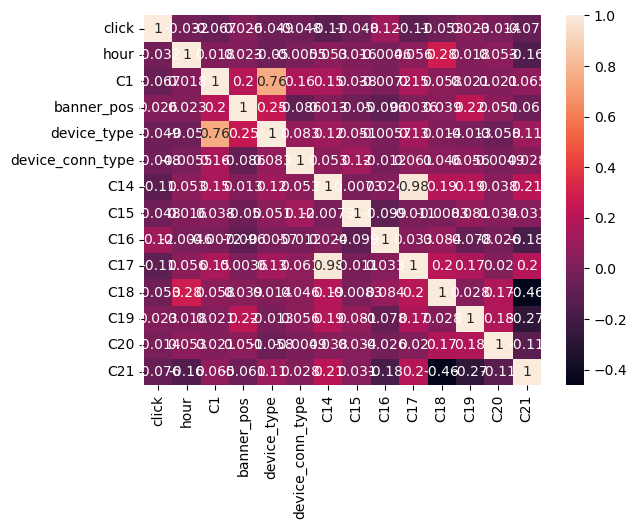

In [12]:
sns.heatmap(df.corr(),annot=True)

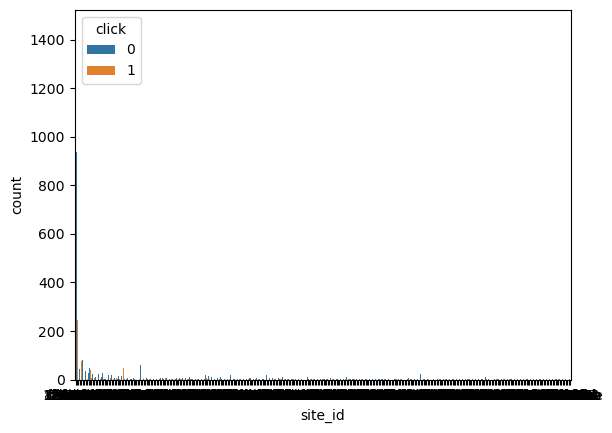

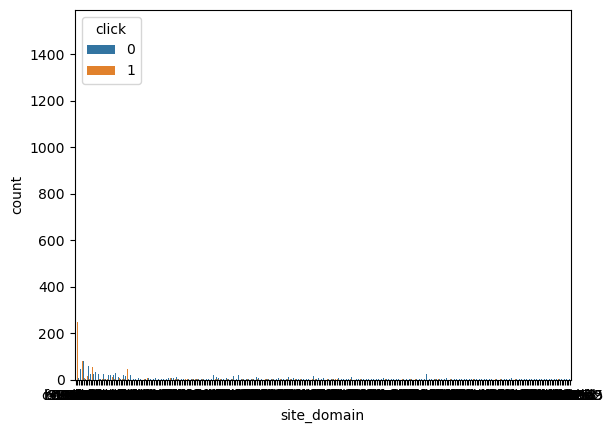

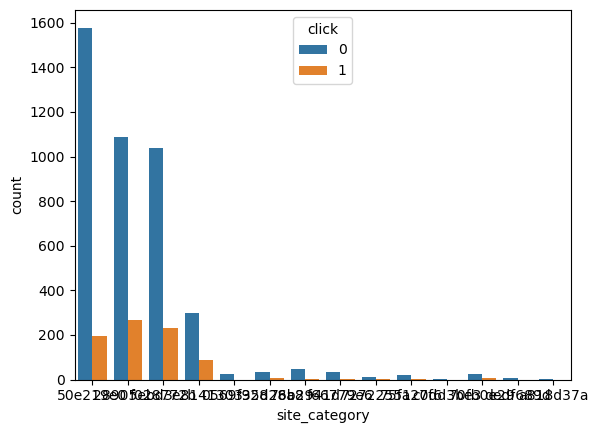

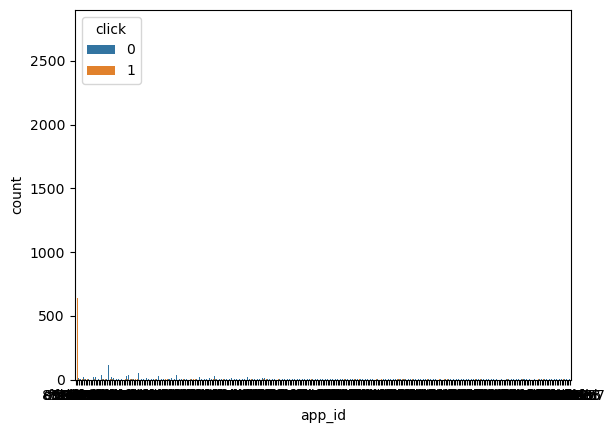

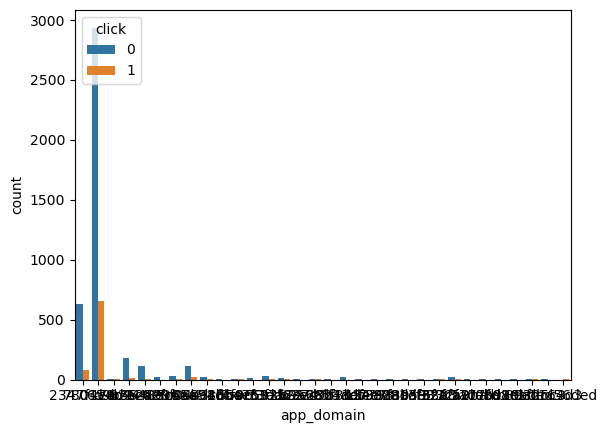

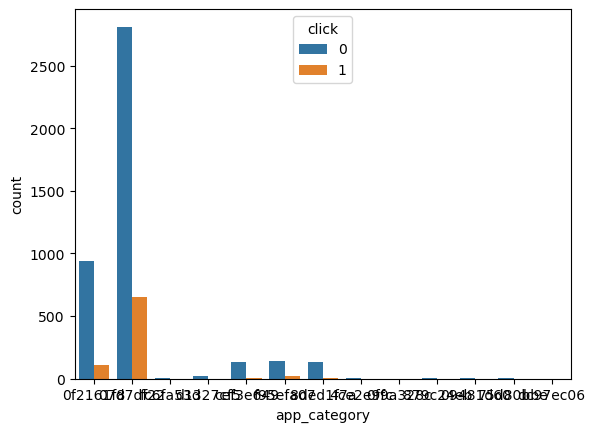

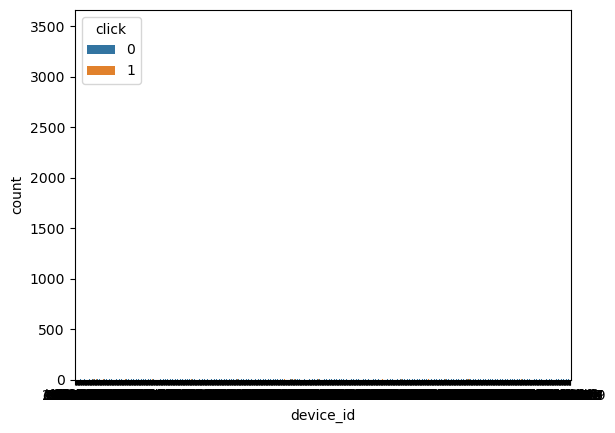

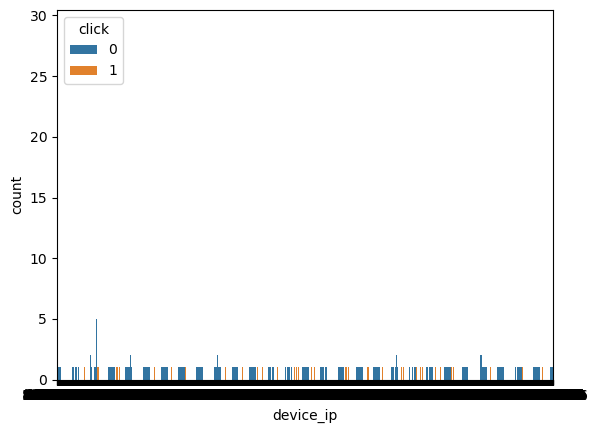

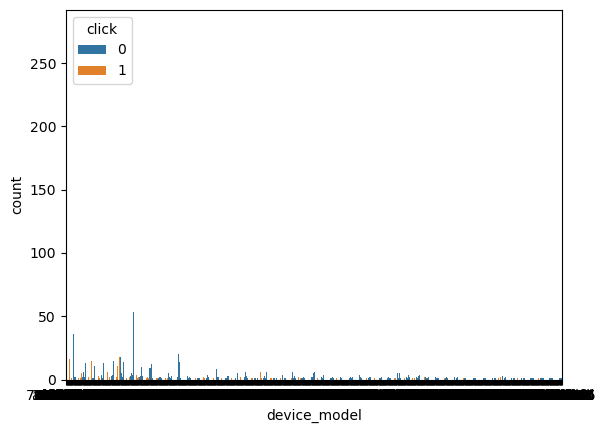

In [13]:
for i in categorical_features:
    
    sns.countplot(data=df , x=i , hue='click' )
    plt.show()

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
categorical_features

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model']

In [17]:
for i in categorical_features:
    df[i]=df[i].astype("string")

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder() 

df['site_id']=labelencoder.fit_transform(df['site_id'])
df['site_id']=df['site_id'].astype('int')

df['site_domain']=labelencoder.fit_transform(df['site_domain'])
df['site_domain']=df['site_domain'].astype('int')

df['site_category']=labelencoder.fit_transform(df['site_category'])
df['site_category']=df['site_category'].astype('int')

df['app_id']=labelencoder.fit_transform(df['app_id'])
df['app_id']=df['app_id'].astype('int')

df['app_domain']=labelencoder.fit_transform(df['app_domain'])
df['app_domain']=df['app_domain'].astype('int')

df['app_category']=labelencoder.fit_transform(df['app_category'])
df['app_category']=df['app_category'].astype('int')

df['device_id']=labelencoder.fit_transform(df['device_id'])
df['device_id']=df['device_id'].astype('int')

df['device_ip']=labelencoder.fit_transform(df['device_ip'])
df['device_ip']=df['device_ip'].astype('int')

df['device_model']=labelencoder.fit_transform(df['device_model'])
df['device_model']=df['device_model'].astype('int')

In [19]:
df[df['site_id']== '1fbe01fe']

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21


In [20]:
df.dtypes

click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             int32
site_domain         int32
site_category       int32
app_id              int32
app_domain          int32
app_category        int32
device_id           int32
device_ip           int32
device_model        int32
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtype: object

In [21]:
X = df.drop(labels=['click'],axis=1)
Y = df.click

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [23]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
5005    0
5006    0
5007    0
5008    1
5009    0
Name: click, Length: 5010, dtype: int64

In [24]:
X.shape

(5010, 22)

In [25]:
Y.shape

(5010,)

In [26]:
X.head()

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,14102100,1005,0,170,229,4,155,4,2,540,...,1,0,20346,300,250,2331,2,39,100060,23
1,14102100,1005,0,39,280,1,275,13,0,540,...,1,0,15705,320,50,1722,0,35,100084,79
2,14102100,1005,0,39,280,1,275,13,0,540,...,1,0,15704,320,50,1722,0,35,-1,79
3,14102100,1005,0,39,280,1,275,13,0,540,...,1,0,15701,320,50,1722,0,35,100084,79
4,14102100,1005,0,28,214,12,275,13,0,540,...,1,0,20596,320,50,2161,0,35,-1,157


In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

In [28]:
df_random= RandomForestClassifier(n_estimators=20, random_state=30)

In [29]:
df_random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=30)

In [30]:
df_random.score(X_train,y_train)

0.9931565440547476

In [31]:
y_pred = df_random.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8236859614105123

In [33]:
grid_param={
    'n_estimators':[5,10,15,20,25,50],
    'criterion':['gini', 'entropy'],
    'max_depth':range(20),
    'min_samples_leaf':range(10)
}
grid_search_cv = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3480 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packa

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=20, random_state=30),
             n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20, 25, 50]},
             verbose=1)

In [34]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'n_estimators': 15}

In [39]:
df_best = RandomForestClassifier(criterion= 'gini',
 max_depth=6,
 min_samples_leaf=9,
 n_estimators=15)

df_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=9, n_estimators=15)

In [40]:
y_pred = df_best.predict(X_test) 

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.8383233532934131